Business Objective: **HOTEL RATING CLASSIFICATION**
<center>
    <img src="https://media1.giphy.com/media/3o85xLCFHDghSNviO4/giphy.gif?cid=ecf05e47osv1he0fgurkqt3pi24tei8oxalc2w4zgwzxu0am&rid=giphy.gif&ct=g" width="200"  align="center"/>
</center>


---



---


- major objective is what are the attributes that travelers are
considering while selecting a hotel.
- With this manager can understand which
elements of their hotel influence more in forming a positive review or improves
hotel brand image.

#Imporing Necessary Libraries

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string  
import spacy 
import nltk

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
#!pip install spacy

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Load the data
data = pd.read_excel('hotel_reviews (1).xlsx')

In [5]:
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
5,love monaco staff husband stayed hotel crazy w...,5.0
6,"cozy stay rainy city, husband spent 7 nights m...",5.0
7,"excellent staff, housekeeping quality hotel ch...",4.0
8,"hotel stayed hotel monaco cruise, rooms genero...",5.0
9,excellent stayed hotel monaco past w/e delight...,5.0


# EDA

In [6]:
data.shape

(20491, 2)

In [7]:
#data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [8]:
#Converting the ratings column from float to int
data['Rating'] = data['Rating'].astype('int')
data.dtypes

Review    object
Rating     int64
dtype: object

In [9]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [10]:
# count of review by the rating
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

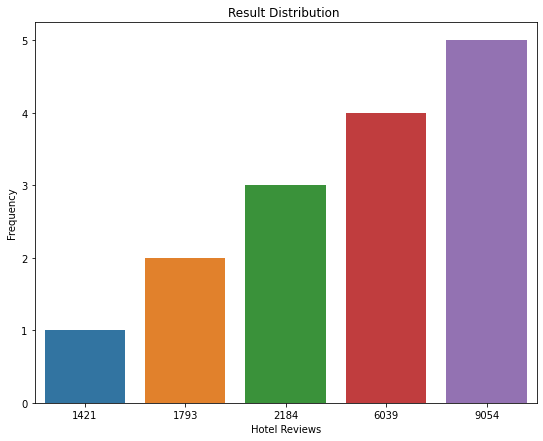

In [11]:
# Hotel review by their frequency 
names = data['Rating'].value_counts()[:6].index
values = data['Rating'].value_counts()[:6].values
plt.figure(figsize=(9,7))
sns.barplot(values,names)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Hotel Reviews', fontsize=10)
plt.xticks(fontsize=10)
plt.show()


**Note**:

- From above visual, we can say that count of ratings for 4, 5 are comparatively much higher than the other rating scores.
- Hence, we can say for our data that most of the users are highly satisfied with their experience at hotels.

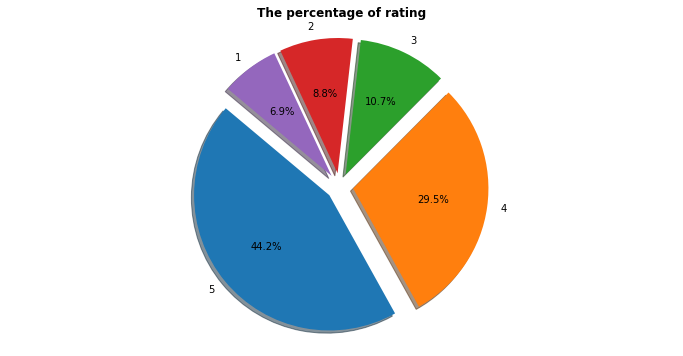

In [12]:
plt.figure(figsize = (12,6))
names = data['Rating'].value_counts()[:6].index
values = data['Rating'].value_counts()[:6].values
explode = (0.1,0.1,0.1,0.1,0.1)  # explode 1st slice

plt.title('The percentage of rating', weight = 'bold')
plt.pie(values, labels=names,explode=explode,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Inferences** 

---


- From above visual, we can say that almost 75% of reviews are rated (5, 4) by users and remaining 25% reviews are rated (3, 2, 1)
- We have an unequal distribution of data, where we have less no. of negative ratings provided by users.
- Hence, our dataset is highly imbalanced dataset.


#Data Preprocessing

In [13]:
#Number of char use in the review 
data['num_characters'] = data['Review'].apply(len)

In [14]:
#Number of words use in the review 
data['num_words'] = data['Review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
#Number of sent use in the review 
data['num_sentences'] = data['Review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
data.head(10)

,Review,Rating,num_characters,num_words,num_sentences
0,nice hotel expensive parking got good deal sta...,4,593,98,1
1,ok nothing special charge diamond member hilto...,2,1689,270,1
2,nice rooms not 4* experience hotel monaco seat...,3,1427,236,2
3,"unique, great stay, wonderful time hotel monac...",5,600,102,1
4,"great stay great stay, went seahawk game aweso...",5,1281,224,1
5,love monaco staff husband stayed hotel crazy w...,5,1002,152,1
6,"cozy stay rainy city, husband spent 7 nights m...",5,748,112,1
7,"excellent staff, housekeeping quality hotel ch...",4,597,91,1
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419,72,1
9,excellent stayed hotel monaco past w/e delight...,5,271,40,1


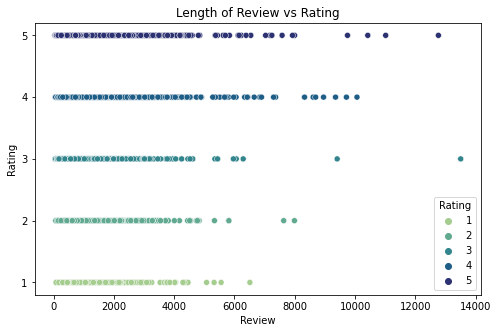

In [17]:
#Checking the length of words in a review for all the rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Review'].apply(len), y=data['Rating'], data=data, palette='crest', hue='Rating')
plt.title('Length of Review vs Rating')
plt.yticks([1,2,3,4,5])
plt.show()

**Note:**

---



---


- From above visual, we can say that the length of review has an effect on ratings.
- Lower ratings have lower length of review compared to top ratings.
Hence, there exists a positive correlation between Length of Reviews & Ratings.

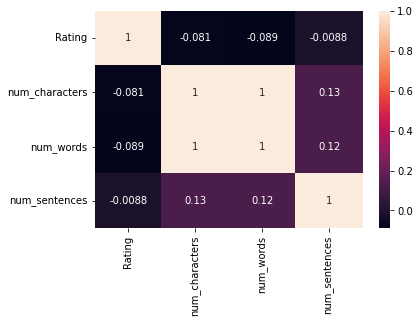

In [18]:
sns.heatmap(data.corr(),annot=True)

# Text Cleaning

In [19]:
import re
import string
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatizer= WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

In [21]:
#The process of reducing the diffrent forms of a word to one single form for ex reducing "builds" "building",or built to the lemma "build"
def lemmatise(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(lemma_words)


In [22]:
data['cleaned_review']=data['Review'].apply(lambda x :preprocess(x))
data['cleaned_review']

0        nice hotel expensive parking got good deal sta...
1        nothing special charge diamond member hilton d...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time staying charm star beat ...
20487    great location price view hotel great quick pl...
20488    look nice modern outside desk staff particular...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking believe excellent rating hotel ...
Name: cleaned_review, Length: 20491, dtype: object

In [23]:
tokenizer = RegexpTokenizer(r'\w+')
data['lemmatized_content']=data['cleaned_review'].map(lambda x : tokenizer.tokenize(lemmatise(x)))
data['lemmatized_content']

0        [nice, hotel, expensive, parking, got, good, d...
1        [nothing, special, charge, diamond, member, hi...
2        [nice, room, experience, hotel, monaco, seattl...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, time, staying, charm, sta...
20487    [great, location, price, view, hotel, great, q...
20488    [look, nice, modern, outside, desk, staff, par...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, believe, excellent, rating, ...
Name: lemmatized_content, Length: 20491, dtype: object

In [24]:
data.head()

,Review,Rating,num_characters,num_words,num_sentences,cleaned_review,lemmatized_content
0,nice hotel expensive parking got good deal sta...,4,593,98,1,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,1689,270,1,nothing special charge diamond member hilton d...,"[nothing, special, charge, diamond, member, hi..."
2,nice rooms not 4* experience hotel monaco seat...,3,1427,236,2,nice room experience hotel monaco seattle good...,"[nice, room, experience, hotel, monaco, seattl..."
3,"unique, great stay, wonderful time hotel monac...",5,600,102,1,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,1281,224,1,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."


# Corpus Visualizing

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n2_words(corpus ,n =None):
    vec1 = CountVectorizer(ngram_range =(1,1),max_features = 2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word,sum_words[0,idx])for word ,idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq , key =lambda x:x[1] ,reverse = True)
    return words_freq[:n]


In [31]:
top1_words = get_top_n2_words(data["Review"],n = 200)
top1_df = pd.DataFrame(top1_words)
top1_df.columns = ["Uni-Gram" , "Freq"]
top1_df.head()

,Uni-Gram,Freq
0,hotel,49814
1,room,35330
2,not,31709
3,great,21475
4,good,17412


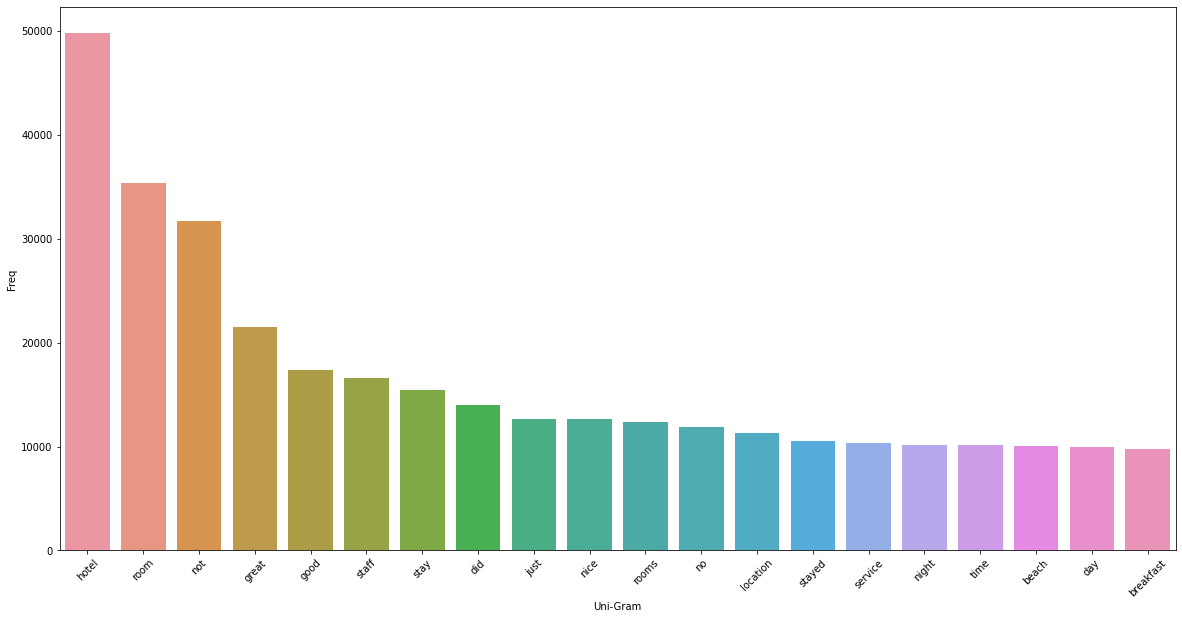

In [32]:
# Uni-Gram plot

top20_bigram = top1_df.iloc[0:20,:]
fig = plt.figure(figsize = (20,10))
plot = sns.barplot(x =top20_bigram["Uni-Gram"],y = top20_bigram["Freq"])
plot.set_xticklabels(rotation = 45,labels=top20_bigram["Uni-Gram"])
plt.show()

In [33]:
def get_top_n2_words(corpus ,n =None):
    vec1 = CountVectorizer(ngram_range =(2,2),max_features = 2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word,sum_words[0,idx])for word ,idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq , key =lambda x:x[1] ,reverse = True)
    return words_freq[:n]

In [34]:
top2_words = get_top_n2_words(data["Review"],n = 200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-Gram" , "Freq"]
top2_df.head()

,Bi-Gram,Freq
0,did not,3773
1,great location,2203
2,staff friendly,2116
3,punta cana,1727
4,walking distance,1468


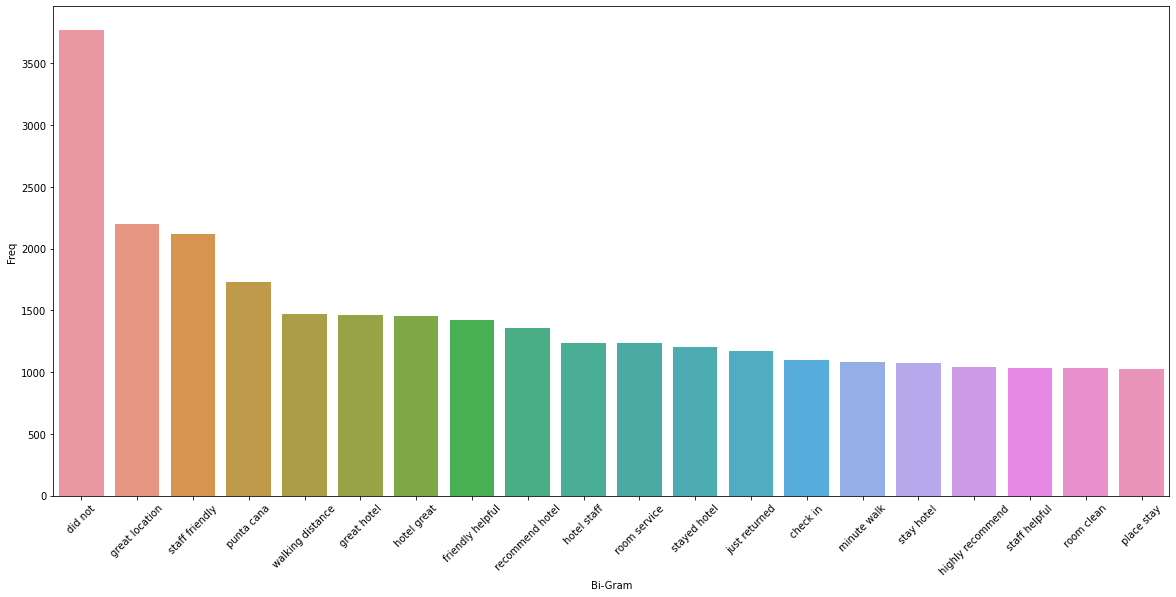

In [35]:
# Bi-Gram plot

top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20,9))
plot = sns.barplot(x =top20_bigram["Bi-Gram"],y = top20_bigram["Freq"])
plot.set_xticklabels(rotation = 45,labels=top20_bigram["Bi-Gram"])
plt.show()

In [36]:
# TRI GRAM
def get_top_n3_words(corpus ,n =None):
    vec1 = CountVectorizer(ngram_range =(3,3),max_features = 2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word,sum_words[0,idx])for word ,idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq , key =lambda x:x[1] ,reverse = True)
    return words_freq[:n]

In [37]:
top3_words = get_top_n3_words(data["Review"],n = 200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-Gram" , "Freq"]
top3_df.head()

,Tri-Gram,Freq
0,staff friendly helpful,767
1,hotel great location,552
2,old san juan,364
3,highly recommend hotel,321
4,great place stay,281


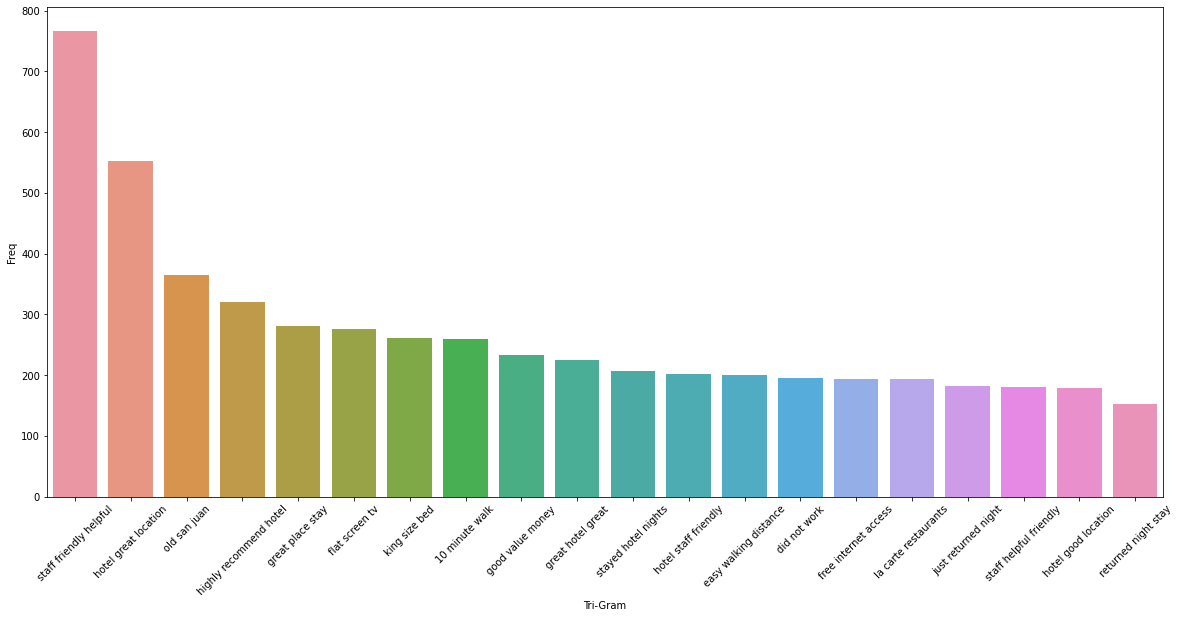

In [38]:
# Tri-Gram PLot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20,9))
plot = sns.barplot(x =top20_trigram["Tri-Gram"],y = top20_trigram["Freq"])
plot.set_xticklabels(rotation = 45,labels=top20_trigram["Tri-Gram"])
plt.show()

# Sentiment analysis 

In [39]:
#!pip install textblob

In [40]:

from textblob import TextBlob
import matplotlib.pyplot  as plt
import seaborn as sns

In [41]:
data['sentiment']=data['cleaned_review'].apply(lambda x : TextBlob(x).sentiment.polarity)
data

,Review,Rating,num_characters,num_words,num_sentences,cleaned_review,lemmatized_content,sentiment
0,nice hotel expensive parking got good deal sta...,4,593,98,1,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...",0.208744
1,ok nothing special charge diamond member hilto...,2,1689,270,1,nothing special charge diamond member hilton d...,"[nothing, special, charge, diamond, member, hi...",0.238948
2,nice rooms not 4* experience hotel monaco seat...,3,1427,236,2,nice room experience hotel monaco seattle good...,"[nice, room, experience, hotel, monaco, seattl...",0.266138
3,"unique, great stay, wonderful time hotel monac...",5,600,102,1,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...",0.504825
4,"great stay great stay, went seahawk game aweso...",5,1281,224,1,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...",0.469643
...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,121,1,best kept secret time staying charm star beat ...,"[best, kept, secret, time, staying, charm, sta...",0.209229
20487,great location price view hotel great quick pl...,4,306,40,1,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...",0.463333
20488,"ok just looks nice modern outside, desk staff ...",2,443,70,1,look nice modern outside desk staff particular...,"[look, nice, modern, outside, desk, staff, par...",0.145929
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,836,1,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...",0.145881


In [42]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
        result = 'positive'

    return result

In [43]:
data['review_segment']=data['sentiment'].apply(assign_Result)
data.head()

,Review,Rating,num_characters,num_words,num_sentences,cleaned_review,lemmatized_content,sentiment,review_segment
0,nice hotel expensive parking got good deal sta...,4,593,98,1,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...",0.208744,positive
1,ok nothing special charge diamond member hilto...,2,1689,270,1,nothing special charge diamond member hilton d...,"[nothing, special, charge, diamond, member, hi...",0.238948,positive
2,nice rooms not 4* experience hotel monaco seat...,3,1427,236,2,nice room experience hotel monaco seattle good...,"[nice, room, experience, hotel, monaco, seattl...",0.266138,positive
3,"unique, great stay, wonderful time hotel monac...",5,600,102,1,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...",0.504825,positive
4,"great stay great stay, went seahawk game aweso...",5,1281,224,1,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...",0.469643,positive


# Data Preprocessing and visualization

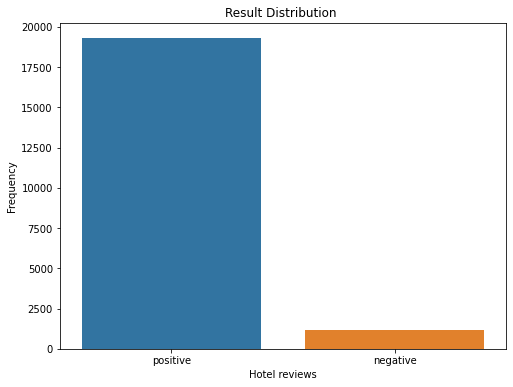

In [44]:
from six import text_type
x=data['review_segment'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x.index,x.values)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Hotel reviews', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

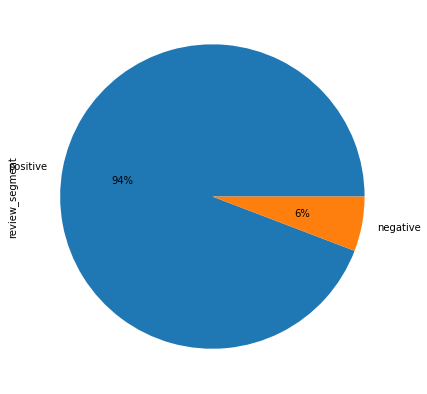

In [45]:
plt.figure(figsize=(10,7))
data['review_segment'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

**Note**
the data look imbalanced

In [46]:
# most common words
tokenizer = RegexpTokenizer(r'\w+')
data['word_count'] = data['cleaned_review'].apply(lambda x: len(str(x).split()))
data['result_len'] = data['cleaned_review'].astype(str).apply(len)
data['result_len']

0         543
1        1539
2        1264
3         557
4        1150
         ... 
20486     666
20487     294
20488     406
20489    5157
20490     565
Name: result_len, Length: 20491, dtype: int64

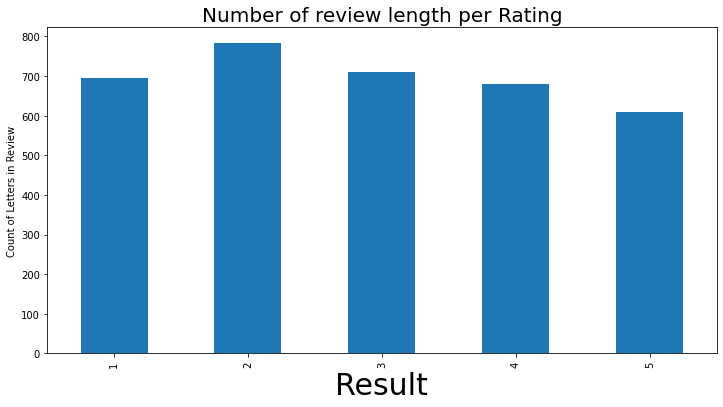

In [47]:
data.groupby('Rating')['result_len'].mean().plot(kind='bar',figsize=(12,6))
plt.xlabel('Result',fontsize=30)
plt.ylabel('Count of Letters in Review')
plt.title('Number of review length per Rating', fontsize=20)
plt.show()

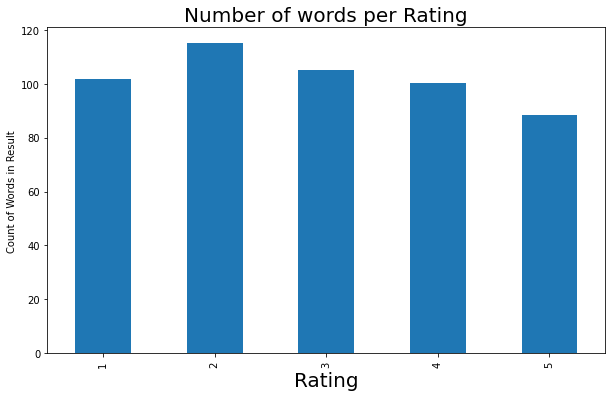

In [48]:
data.groupby('Rating')['word_count'].mean().plot(kind='bar',figsize=(10,6))
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Count of Words in Result')
plt.title('Number of words per Rating', fontsize=20)
plt.show()

In [49]:
words=data['lemmatized_content']
allwords=[]
for wordlist in words:
    allwords+=wordlist
print(allwords)
print('length of all words : ',len(allwords))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [50]:
from nltk.probability import FreqDist
mostcommon=FreqDist(allwords).most_common(100)
#mostcommon

In [51]:
#!pip install wordcloud

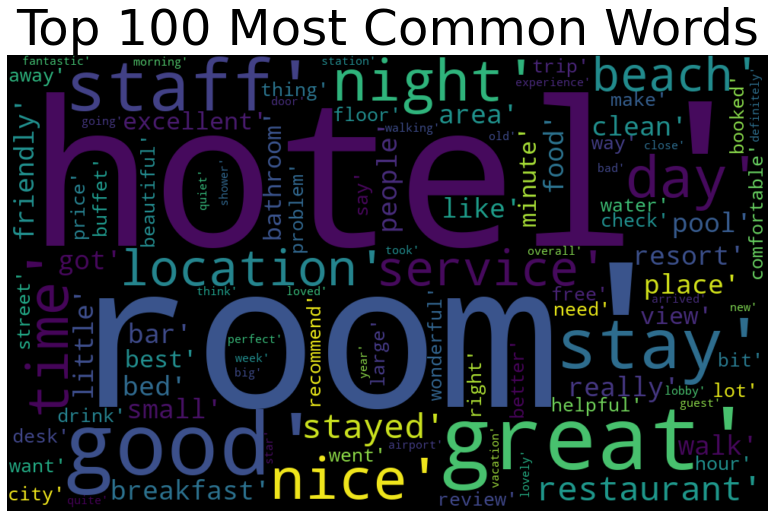

In [52]:
#elements of their hotel influence more in forming a positive review
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=1000, height=600, background_color='black').generate(str(mostcommon))
fig = plt.figure(figsize=(12,7), facecolor='white')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

In [53]:
from collections import Counter
mostfreq=data.groupby('Rating')['cleaned_review'].apply(lambda x : Counter(' '.join(x).split()).most_common(25))
mostfreq

Rating
1    [(room, 4294), (hotel, 4002), (stay, 1246), (d...
2    [(room, 5772), (hotel, 4657), (night, 1618), (...
3    [(room, 6128), (hotel, 5628), (good, 2523), (n...
4    [(hotel, 15535), (room, 14238), (great, 7572),...
5    [(hotel, 24164), (room, 17314), (great, 10886)...
Name: cleaned_review, dtype: object

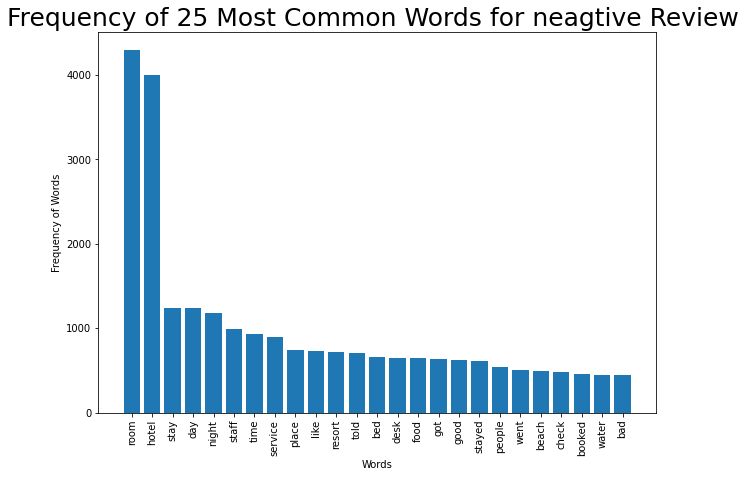

In [54]:
neagtive=mostfreq.iloc[0]
words=list(zip(*neagtive))[0]
freq=list(zip(*neagtive))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for neagtive Review ', fontsize=25)
plt.show()

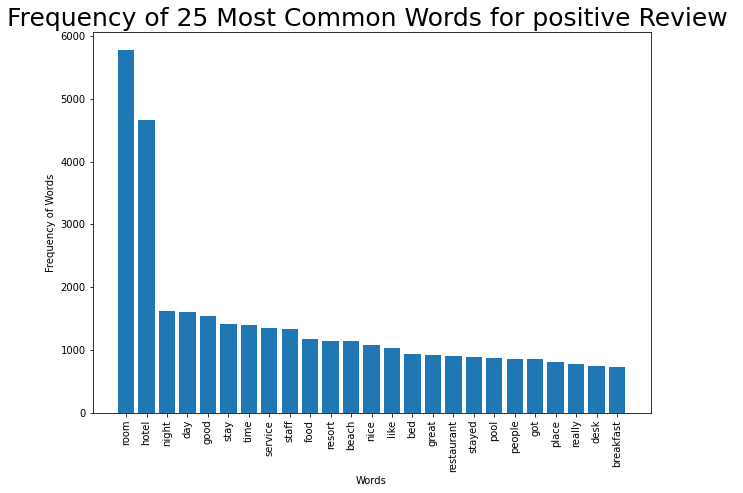

In [55]:
positive=mostfreq.iloc[1]
words=list(zip(*positive))[0]
freq=list(zip(*positive))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for positive Review ', fontsize=25)
plt.show()

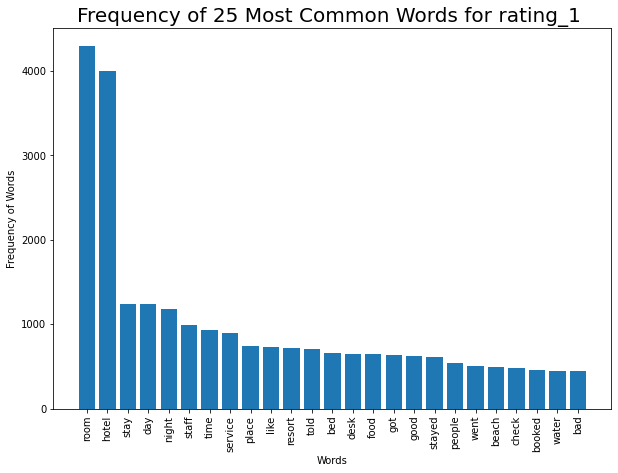

In [56]:
rating_1=mostfreq.iloc[0]
words=list(zip(*rating_1))[0]
freq=list(zip(*rating_1))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_1 ', fontsize=20)
plt.show()

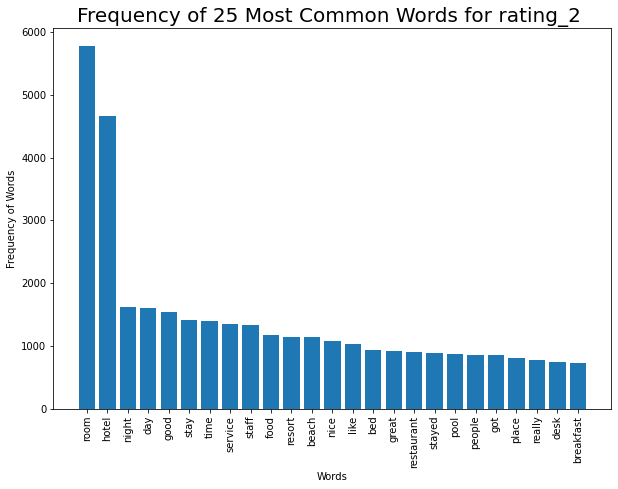

In [57]:
rating_2=mostfreq.iloc[1]
words=list(zip(*rating_2))[0]
freq=list(zip(*rating_2))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_2 ', fontsize=20)
plt.show()

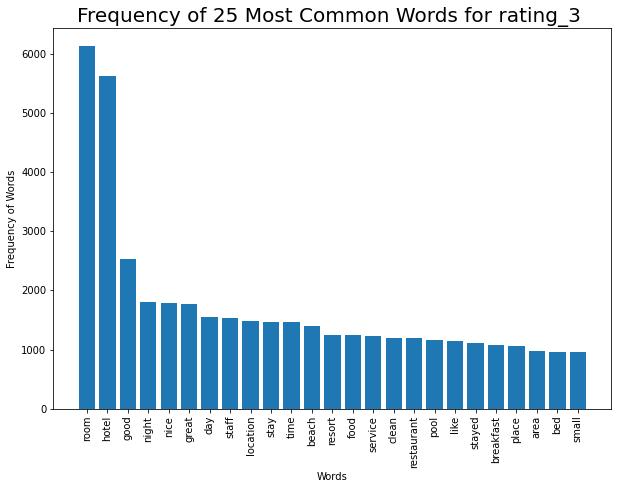

In [58]:
rating_3=mostfreq.iloc[2]
words=list(zip(*rating_3))[0]
freq=list(zip(*rating_3))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_3 ', fontsize=20)
plt.show()

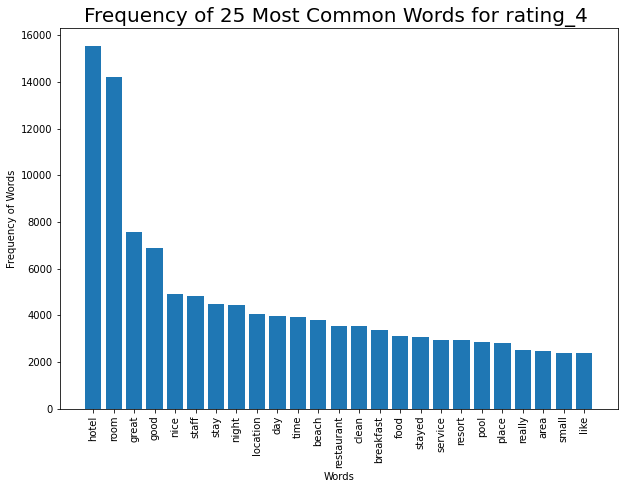

In [59]:
rating_4=mostfreq.iloc[3]
words=list(zip(*rating_4))[0]
freq=list(zip(*rating_4))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_4 ', fontsize=20)
plt.show()

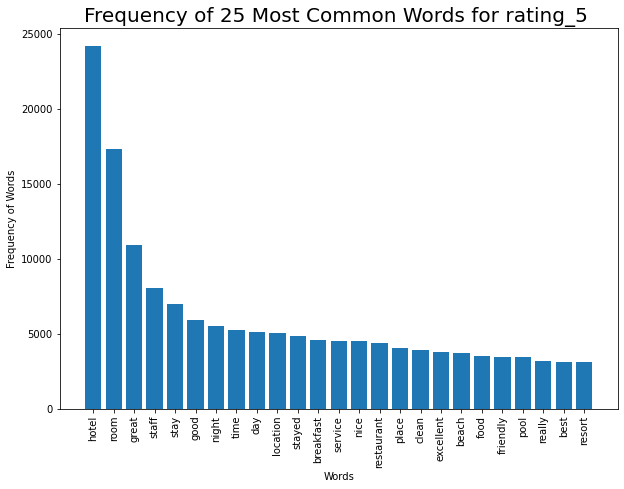

In [60]:
rating_5=mostfreq.iloc[4]
words=list(zip(*rating_5))[0]
freq=list(zip(*rating_5))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_5 ', fontsize=20)
plt.show()

In [61]:
pos = [5,4]
neg = [1,2,3]

In [62]:
def sentiment(rating):
  if rating in pos:
    return "positive"
  else:
    return "negative"

In [63]:
data['sentiment'] = data['Rating'].apply(sentiment)
data

,Review,Rating,num_characters,num_words,num_sentences,cleaned_review,lemmatized_content,sentiment,review_segment,word_count,result_len
0,nice hotel expensive parking got good deal sta...,4,593,98,1,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...",positive,positive,81,543
1,ok nothing special charge diamond member hilto...,2,1689,270,1,nothing special charge diamond member hilton d...,"[nothing, special, charge, diamond, member, hi...",negative,positive,224,1539
2,nice rooms not 4* experience hotel monaco seat...,3,1427,236,2,nice room experience hotel monaco seattle good...,"[nice, room, experience, hotel, monaco, seattl...",negative,positive,187,1264
3,"unique, great stay, wonderful time hotel monac...",5,600,102,1,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...",positive,positive,84,557
4,"great stay great stay, went seahawk game aweso...",5,1281,224,1,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...",positive,positive,171,1150
...,...,...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,121,1,best kept secret time staying charm star beat ...,"[best, kept, secret, time, staying, charm, sta...",positive,positive,100,666
20487,great location price view hotel great quick pl...,4,306,40,1,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...",positive,positive,43,294
20488,"ok just looks nice modern outside, desk staff ...",2,443,70,1,look nice modern outside desk staff particular...,"[look, nice, modern, outside, desk, staff, par...",negative,positive,60,406
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,836,1,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...",negative,positive,725,5157


In [64]:
data.sentiment.value_counts()

positive    15093
negative     5398
Name: sentiment, dtype: int64

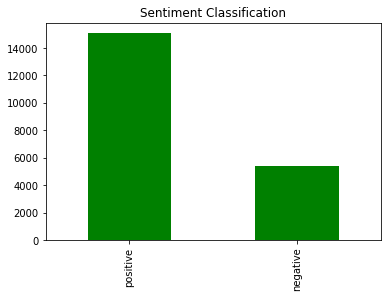

In [65]:
# let's see how many ratio of sentiment
data.sentiment.value_counts().plot(kind='bar', color='green')
plt.title('Sentiment Classification')
plt.show()

In [66]:
# Vectorizing
# transform the text to numeric data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit(data['cleaned_review'])

In [67]:
X_train_tfidf_transform = X_train_tfidf.transform(data['cleaned_review'])

# Model Building

In [68]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf_transform,data['review_segment'],test_size=0.3, random_state=30,shuffle=True)

In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



In [70]:
print(X_train.shape,y_train.shape)
X_test.shape,y_test.shape

(14343, 45604) (14343,)


((6148, 45604), (6148,))

In [71]:
def accuracy(y_train,y_train_pred,y_test,y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(y_train,y_train_pred))
    print('\n',confusion_matrix(y_train,y_train_pred))
    print('\n',accuracy_score(y_train,y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(y_test,y_test_pred))
    print('\n',confusion_matrix(y_test,y_test_pred))
    print('\n',accuracy_score(y_test,y_test_pred))  

# Logistic Regression

In [72]:
#1) Logistic regression
lg = LogisticRegression()
lg_model = lg.fit(X_train,y_train)
y_train_pred = lg_model.predict(X_train)
y_test_pred = lg_model.predict(X_test)

In [73]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      0.36      0.53       866
    positive       0.96      1.00      0.98     13477

    accuracy                           0.96     14343
   macro avg       0.98      0.68      0.76     14343
weighted avg       0.96      0.96      0.95     14343


 [[  316   550]
 [    1 13476]]

 0.9615840479676497
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.95      0.24      0.38       324
    positive       0.96      1.00      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.96      0.62      0.68      6148
weighted avg       0.96      0.96      0.95      6148


 [[  78  246]
 [   4 5820]]

 0.9593363695510735


In [74]:
Data_models = pd.DataFrame(columns = ['Model','Train_Accuracy','Test_Accuracy'])

In [75]:
lg_train =accuracy_score(y_train,y_train_pred)
lg_test  =accuracy_score(y_test,y_test_pred)


Data_models.loc[1,'Model'] = 'Logistic Regression'
Data_models.loc[1,"Train_Accuracy"] = lg_train
Data_models.loc[1,"Test_Accuracy"] = lg_test

In [76]:
def get_percentage(num):
    return "{:.2f}".format(num*100)

In [77]:
Data_models["Train_Accuracy"] = Data_models["Train_Accuracy"].apply(get_percentage)
Data_models["Test_Accuracy"]  = Data_models["Test_Accuracy"].apply(get_percentage)
Data_models

,Model,Train_Accuracy,Test_Accuracy
1,Logistic Regression,96.16,95.93


In [78]:
y_pred = lg.predict(X_test)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.95      0.24      0.38       324
    positive       0.96      1.00      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.96      0.62      0.68      6148
weighted avg       0.96      0.96      0.95      6148



** Overall Accuracy for Logistic Regression is 97%**

# Naive Bayes

In [80]:
#2) Multinomial Naive Bayes
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

In [81]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       866
    positive       0.94      1.00      0.97     13477

    accuracy                           0.94     14343
   macro avg       0.47      0.50      0.48     14343
weighted avg       0.88      0.94      0.91     14343


 [[    0   866]
 [    0 13477]]

 0.9396221153175766
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       324
    positive       0.95      1.00      0.97      5824

    accuracy                           0.95      6148
   macro avg       0.47      0.50      0.49      6148
weighted avg       0.90      0.95      0.92      6148


 [[   0  324]
 [   0 5824]]

 0.9472999349381913


In [82]:
y_pred = nb.predict(X_test)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       324
    positive       0.95      1.00      0.97      5824

    accuracy                           0.95      6148
   macro avg       0.47      0.50      0.49      6148
weighted avg       0.90      0.95      0.92      6148



**Overall Accuracy for Naive Bayes is 95%**

# Random Forest

In [84]:
#3) Random Forest
rf = RandomForestClassifier(max_features=400)
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [85]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      1.00      1.00     14343
weighted avg       1.00      1.00      1.00     14343


 [[  866     0]
 [    0 13477]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.97      0.09      0.17       324
    positive       0.95      1.00      0.98      5824

    accuracy                           0.95      6148
   macro avg       0.96      0.55      0.57      6148
weighted avg       0.95      0.95      0.93      6148


 [[  30  294]
 [   1 5823]]

 0.9520169160702667


In [86]:
y_pred = rf.predict(X_test)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.97      0.09      0.17       324
    positive       0.95      1.00      0.98      5824

    accuracy                           0.95      6148
   macro avg       0.96      0.55      0.57      6148
weighted avg       0.95      0.95      0.93      6148



**Overall Accuracy for random Forest is 95%**

#Gradient Boost

In [88]:
#4) Gradiient Boost
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [89]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.94      0.51      0.67       866
    positive       0.97      1.00      0.98     13477

    accuracy                           0.97     14343
   macro avg       0.96      0.76      0.82     14343
weighted avg       0.97      0.97      0.96     14343


 [[  445   421]
 [   27 13450]]

 0.9687652513421181
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.80      0.44      0.57       324
    positive       0.97      0.99      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.89      0.72      0.78      6148
weighted avg       0.96      0.96      0.96      6148


 [[ 143  181]
 [  35 5789]]

 0.9648666232921275


In [90]:
y_pred = gb.predict(X_test)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.44      0.57       324
    positive       0.97      0.99      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.89      0.72      0.78      6148
weighted avg       0.96      0.96      0.96      6148



**Overall Accuracy for random Forest is 96%**

# SVM

In [92]:
# 5) svm
from sklearn.svm import SVC
clf = SVC(kernel='linear',C=10)
clf.fit(X_train , y_train) 

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [93]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      1.00      1.00     14343
weighted avg       1.00      1.00      1.00     14343


 [[  866     0]
 [    0 13477]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.77      0.67      0.72       324
    positive       0.98      0.99      0.99      5824

    accuracy                           0.97      6148
   macro avg       0.88      0.83      0.85      6148
weighted avg       0.97      0.97      0.97      6148


 [[ 217  107]
 [  65 5759]]

 0.9720234222511386


In [94]:
y_pred = clf.predict(X_test)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.77      0.67      0.72       324
    positive       0.98      0.99      0.99      5824

    accuracy                           0.97      6148
   macro avg       0.88      0.83      0.85      6148
weighted avg       0.97      0.97      0.97      6148



**Overall Accuracy for random Forest is 97%**

#Prediction
- considering SVM as the final model

In [96]:
clf.fit(X_train_tfidf_transform, data['review_segment']) 

SVC(C=10, kernel='linear')

**Predict Positive Review**

In [125]:
new_data = ['unique, great stay','great location price view hotel great quick',
           'loved, stayed warwick overnight getway enjoy','pay read reviews booked knew getting']

In [126]:
new_clean_data = list(map(preprocess, new_data))
new_clean_data

['unique great stay',
 'great location price view hotel great quick',
 'loved stayed warwick overnight getway enjoy',
 'pay read review booked knew getting']

In [127]:
new_data_tf = tfidf_vect.transform(new_clean_data)
new_data_tf

<4x45604 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [128]:
clf_pred_train_y = clf.predict(new_data_tf)
clf_pred_train_y

array(['positive', 'positive', 'positive', 'positive'], dtype=object)

In [129]:
reviewText = "excellent stay delightful surprise stay"

In [130]:
cleanReviewText = preprocess(reviewText)
cleanReviewText

'excellent stay delightful surprise stay'

In [131]:
textTfIDF = tfidf_vect.transform([cleanReviewText])

In [132]:
predictedOutput=clf.predict(textTfIDF)
predictedOutput = predictedOutput[0]
predictedOutput

'positive'

In [133]:
prdictionDist = clf.predict(textTfIDF)
prdictionDist


array(['positive'], dtype=object)

**Predict Negative Review**

In [134]:
new="horrible customer worst bad not nice"

In [135]:
new_data1 = tfidf_vect.transform(new_clean_data)
new_data1

<4x45604 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [136]:
clf_pred_train_y = clf.predict(new_data1)
clf_pred_train_y

array(['positive', 'positive', 'positive', 'positive'], dtype=object)

In [137]:
reviewText = "horrible bad worst not stay"

In [138]:
cleanReviewText = preprocess(reviewText)
cleanReviewText

'horible bad worst stay'

In [139]:
textTfIDF = tfidf_vect.transform([cleanReviewText])

In [140]:
predictedOutput=clf.predict(textTfIDF)
predictedOutput = predictedOutput[0]
predictedOutput

'negative'

In [141]:
prdictionDist = clf.predict(textTfIDF)
prdictionDist


array(['negative'], dtype=object)

# save the model

In [ ]:
import pickle
import requests
import json
import joblib

In [ ]:
pickle_out = open("model_1.pkl","wb")
pickle_out=joblib.dump(lg_model,pickle_out)
pickle_out

In [ ]:
pickle_out_tfidf = open("model_1_tfidf.pkl","wb")
pickle_out_tfidf=joblib.dump(tfidf_vect,pickle_out_tfidf)
pickle_out_tfidf